In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from prepare import tts, explore_conflict

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
conflict=explore_conflict()

In [3]:
conflict.head()

,location,side_a,side_a_2nd,side_b,side_b_2nd,incompatibility,territory_name,type_of_conflict,start_date,start_date2,region,time_to_conflict
0,India,Government of India,0,GNLA,0,1,Garoland,3,1997-05-29,2012-11-15,3,5649
1,"Egypt, Israel",Government of Egypt,0,Government of Israel,0,1,Suez/Sinai,2,1967-06-05,1967-06-05,2,0
2,Sudan,Government of Sudan,0,Republic of South Sudan,0,1,Abyei,3,2011-05-01,2011-05-19,4,18
3,South Sudan,Government of South Sudan,0,"SSDM/A, SSLM/A",0,2,Government,3,2011-08-20,2011-08-20,4,0
4,Libya,Government of Libya,1,"Forces of Muammar Gaddafi, NTC",0,2,Government,4,2011-02-28,2011-03-04,4,4


In [4]:
conflict['location'].value_counts().head(10)

India                    12
Russia (Soviet Union)    11
Myanmar (Burma)          11
Ethiopia                  9
Indonesia                 6
Nigeria                   5
DR Congo (Zaire)          5
Iran                      5
Ukraine                   4
Pakistan                  4
Name: location, dtype: int64

In [5]:
for i, n in enumerate(conflict['location']):
    if n=='India':
        conflict.at[i, 'location'] = 0
    elif n=='Russia (Soviet Union)':
        conflict.at[i, 'location'] = 1
    elif n=='Myanmar (Burma)':
        conflict.at[i, 'location'] = 2
    elif n=='Ethiopia':
        conflict.at[i, 'location'] = 3
    elif n=='Indonesia':
        conflict.at[i, 'location'] = 4
    elif n=='Nigeria':
        conflict.at[i, 'location'] = 5
    elif n=='DR Congo (Zaire)':
        conflict.at[i, 'location'] = 6
    elif n=='Iran':
        conflict.at[i, 'location'] = 7
    elif n=='Ukraine':
        conflict.at[i, 'location'] = 8
    elif n=='Pakistan':
        conflict.at[i, 'location'] = 9
    else:
        conflict.at[i, 'location'] = 10

In [6]:
conflict['side_a'].value_counts().head(10)

Government of India                    13
Government of France                   12
Government of Russia (Soviet Union)    11
Government of Myanmar (Burma)          11
Government of Ethiopia                 10
Government of China                     9
Government of Iran                      7
Government of United Kingdom            7
Government of Indonesia                 7
Government of DR Congo (Zaire)          5
Name: side_a, dtype: int64

In [7]:
for i, n in enumerate(conflict['side_a']):
    if n=='Government of India':
        conflict.at[i, 'side_a'] = 0
    elif n=='Government of France':
        conflict.at[i, 'side_a'] = 1
    elif n=='Government of Russia (Soviet Union)':
        conflict.at[i, 'side_a'] = 2
    elif n=='Government of Myanmar (Burma)':
        conflict.at[i, 'side_a'] = 3
    elif n=='Government of Ethiopia':
        conflict.at[i, 'side_a'] = 4
    elif n=='Government of China':
        conflict.at[i, 'side_a'] = 5
    elif n=='Government of Iran':
        conflict.at[i, 'side_a'] = 6
    elif n=='Government of United Kingdom':
        conflict.at[i, 'side_a'] = 7
    elif n=='Government of Indonesia':
        conflict.at[i, 'side_a'] = 8
    elif n=='Government of DR Congo (Zaire)':
        conflict.at[i, 'side_a'] = 9
    else:
        conflict.at[i, 'side_a'] = 10

In [8]:
conflict['side_b'].value_counts().head(20)

IS                                        25
Government of Thailand                     3
Government of United Kingdom               3
Government of Russia (Soviet Union)        3
Government of Israel                       3
Government of Vietnam (North Vietnam)      3
Government of Iraq                         2
PLA                                        2
UCK                                        2
POLISARIO                                  2
National Liberation Army                   2
Government of India                        2
CPM                                        2
Government of Nigeria                      2
Government of United States of America     2
NLA                                        2
CPI                                        2
UPC                                        2
Military faction (navy)                    2
AQIM                                       2
Name: side_b, dtype: int64

In [9]:
for i, n in enumerate(conflict['side_b']):
    if n=='IS':
        conflict.at[i, 'side_b'] = 0
    elif n=='Government of Thailand':
        conflict.at[i, 'side_b'] = 1
    elif n=='Government of United Kingdom':
        conflict.at[i, 'side_b'] = 2
    elif n=='Government of Russia (Soviet Union)':
        conflict.at[i, 'side_b'] = 3
    elif n=='Government of Israel':
        conflict.at[i, 'side_b'] = 4
    elif n=='Government of Vietnam (North Vietnam)':
        conflict.at[i, 'side_b'] = 5
    elif n=='Government of Iraq':
        conflict.at[i, 'side_b'] = 6
    elif n=='PLA':
        conflict.at[i, 'side_b'] = 7
    elif n=='UCK':
        conflict.at[i, 'side_b'] = 8
    elif n=='POLISARIO':
        conflict.at[i, 'side_b'] = 9
    elif n=='National Liberation Army':
        conflict.at[i, 'side_b'] = 10
    elif n=='Government of India':
        conflict.at[i, 'side_b'] = 11
    elif n=='CPM':
        conflict.at[i, 'side_b'] = 12
    elif n=='Government of Nigeria':
        conflict.at[i, 'side_b'] = 13
    elif n=='Government of United States of America':
        conflict.at[i, 'side_b'] = 14
    elif n=='NLA':
        conflict.at[i, 'side_b'] = 15
    elif n=='CPI':
        conflict.at[i, 'side_b'] = 16
    elif n=='UPC':
        conflict.at[i, 'side_b'] = 17
    elif n=='Military faction (navy)':
        conflict.at[i, 'side_b'] = 18
    elif n=='AQIM':
        conflict.at[i, 'side_b'] = 19
    else:
        conflict.at[i, 'side_b'] = 20

In [10]:
conflict.start_date.astype('str').str.startswith('19').value_counts()

True     234
False     60
Name: start_date, dtype: int64

In [11]:
for i, n in enumerate(conflict.start_date.astype('str').str.startswith('19')):
    if n==True:
        conflict.at[i, 'start_date'] = 0
    else:
        conflict.at[i, 'start_date'] = 1

In [12]:
conflict.head()

,location,side_a,side_a_2nd,side_b,side_b_2nd,incompatibility,territory_name,type_of_conflict,start_date,start_date2,region,time_to_conflict
0,0,0,0,20,0,1,Garoland,3,0,2012-11-15,3,5649
1,10,10,0,4,0,1,Suez/Sinai,2,0,1967-06-05,2,0
2,10,10,0,20,0,1,Abyei,3,1,2011-05-19,4,18
3,10,10,0,20,0,2,Government,3,1,2011-08-20,4,0
4,10,10,1,20,0,2,Government,4,1,2011-03-04,4,4


In [13]:
for i, n in enumerate(conflict['time_to_conflict']):
    if n<=30:
        conflict.at[i, 'time_to_conflict'] = 1
    elif 30<n<=365:
        conflict.at[i, 'time_to_conflict'] = 2
    elif n>365:
        conflict.at[i, 'time_to_conflict'] = 3

In [14]:
conflict[conflict['time_to_conflict']==1].shape

(190, 12)

In [15]:
conflict.head()

,location,side_a,side_a_2nd,side_b,side_b_2nd,incompatibility,territory_name,type_of_conflict,start_date,start_date2,region,time_to_conflict
0,0,0,0,20,0,1,Garoland,3,0,2012-11-15,3,3
1,10,10,0,4,0,1,Suez/Sinai,2,0,1967-06-05,2,1
2,10,10,0,20,0,1,Abyei,3,1,2011-05-19,4,1
3,10,10,0,20,0,2,Government,3,1,2011-08-20,4,1
4,10,10,1,20,0,2,Government,4,1,2011-03-04,4,1


In [16]:
conflict=pd.get_dummies(conflict, columns=['location','side_a', 'side_a_2nd', 'side_b',
                                           'side_b_2nd', 'type_of_conflict',
                                           'region', 'incompatibility', 'start_date'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [17]:
conflict=conflict.drop(columns=['territory_name', 'start_date2'])

In [18]:
conflict.head()

,time_to_conflict,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,...,"region_1, 5",region_2,region_3,region_4,region_5,incompatibility_1,incompatibility_2,incompatibility_3,start_date_0,start_date_1
0,3,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [19]:
conflict=conflict.astype('int')

# Modeling Preperation:
* Dummies were encoded for:
    * `location`, `side_a`, `side_b`, `territory_name`, `type_of_conflict`, `region`, and `incompatibility`
* Dropped columns:
    * `start_date` and `start_date2`
* Grouped `time_to_conflict` into 3 catagories:
    * 1- short time to conflict (x<30)
    * 2- moderate time to conflict (30<x<365)
    * 3- long time to conflict (x>365)

In [20]:
train, val, test=tts(conflict, 'time_to_conflict')

In [59]:
train.shape, val.shape, test.shape

((211, 69), (53, 68), (30, 68))

In [21]:
x_train= train.drop(columns=['time_to_conflict'])
y_train= train['time_to_conflict']

x_val= val.drop(columns=['time_to_conflict'])
y_val= val['time_to_conflict']

x_test= test.drop(columns=['time_to_conflict'])
y_test= test['time_to_conflict']

## baseline

In [22]:
y_train.mode()

0    1
Name: time_to_conflict, dtype: int64

In [23]:
train['baseline']=1


In [24]:
accuracy_score(y_train, train['baseline'])

0.6255924170616114

## Modeling-RandomForest

In [25]:
metrics= []

for n in range(1, 21):
    for i in range(2, 21):
                                                    #build the model
        rm= RandomForestClassifier(max_depth= i,
                                         min_samples_leaf= n, random_state=8675309)
                                                    #fit the model
        rm.fit(x_train, y_train)
                                                    #get accuracy from in and out of sample data
        in_sample= rm.score(x_train, y_train)
        out_of_sample= rm.score(x_val, y_val)
                                                    #assigning the output to a dictionary
        output={
            'max_depth': i,
            'min_samples_leaf': n,
            'train_accuracy': in_sample,
            'validate_accuracy': out_of_sample
        }
                                                    #appending the output dictionary to the empty metrics list
        metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy']

In [26]:
metrics.head().sort_values(by='difference', ascending=True)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,1,0.625592,0.603774,0.021819
1,3,1,0.658768,0.584906,0.073862
2,4,1,0.677725,0.603774,0.073952
3,5,1,0.687204,0.603774,0.083430
4,6,1,0.706161,0.584906,0.121255


In [28]:
metrics.head().sort_values(by='validate_accuracy', ascending=False)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,1,0.625592,0.603774,0.021819
2,4,1,0.677725,0.603774,0.073952
3,5,1,0.687204,0.603774,0.083430
1,3,1,0.658768,0.584906,0.073862
4,6,1,0.706161,0.584906,0.121255


# Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
metrics=[]
for n in range(1,21):
    for i in range(1,21):
        dtc=DecisionTreeClassifier(max_depth=n, min_samples_leaf=i, random_state=8675309)

        dtc.fit(x_train, y_train)

        in_sample= dtc.score(x_train, y_train)
        out_of_sample= dtc.score(x_val, y_val)

        output={
                'max_depth': i,
                'min_samples_leaf': n,
                'train_accuracy': in_sample,
                'validate_accuracy': out_of_sample
            }
        metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy']

In [31]:
metrics.head().sort_values(by='difference', ascending=True)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,1,1,0.649289,0.622642,0.026648
1,2,1,0.649289,0.622642,0.026648
2,3,1,0.649289,0.622642,0.026648
3,4,1,0.649289,0.622642,0.026648
4,5,1,0.649289,0.622642,0.026648


## knn

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metrics=[]
for n in range(1,21):
    knn= KNeighborsClassifier(n_neighbors=n, weights='uniform')
    knn.fit(x_train,y_train)
    
    in_sample= knn.score(x_train, y_train)
    out_of_sample= knn.score(x_val, y_val)
    
    output={
                'n_neighbors': n,
                'train_accuracy': in_sample,
                'validate_accuracy': out_of_sample
            }
    metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy'] 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [34]:
metrics.head().sort_values(by='difference', ascending=True)

,n_neighbors,train_accuracy,validate_accuracy,difference
2,3,0.720379,0.622642,0.097738
1,2,0.725118,0.603774,0.121345
4,5,0.710900,0.566038,0.144863
3,4,0.706161,0.528302,0.177859
0,1,0.777251,0.584906,0.192346


## logistic regression

In [55]:
logit = LogisticRegression(C=.5, random_state=8675309, intercept_scaling=1, solver='lbfgs')

In [56]:
logit.fit(x_train, y_train)

LogisticRegression(C=0.5, random_state=8675309)

In [57]:
logit.score(x_train,y_train)

0.7061611374407583

In [58]:
logit.score(x_val, y_val)

0.6415094339622641

## liblinear

In [47]:
logit = LogisticRegression(C=1, random_state=8675309, solver='liblinear')

In [48]:
logit.fit(x_train, y_train)

LogisticRegression(C=1, random_state=8675309, solver='liblinear')

In [49]:
logit.score(x_train,y_train)

0.7109004739336493

In [50]:
logit.score(x_val, y_val)

0.6415094339622641

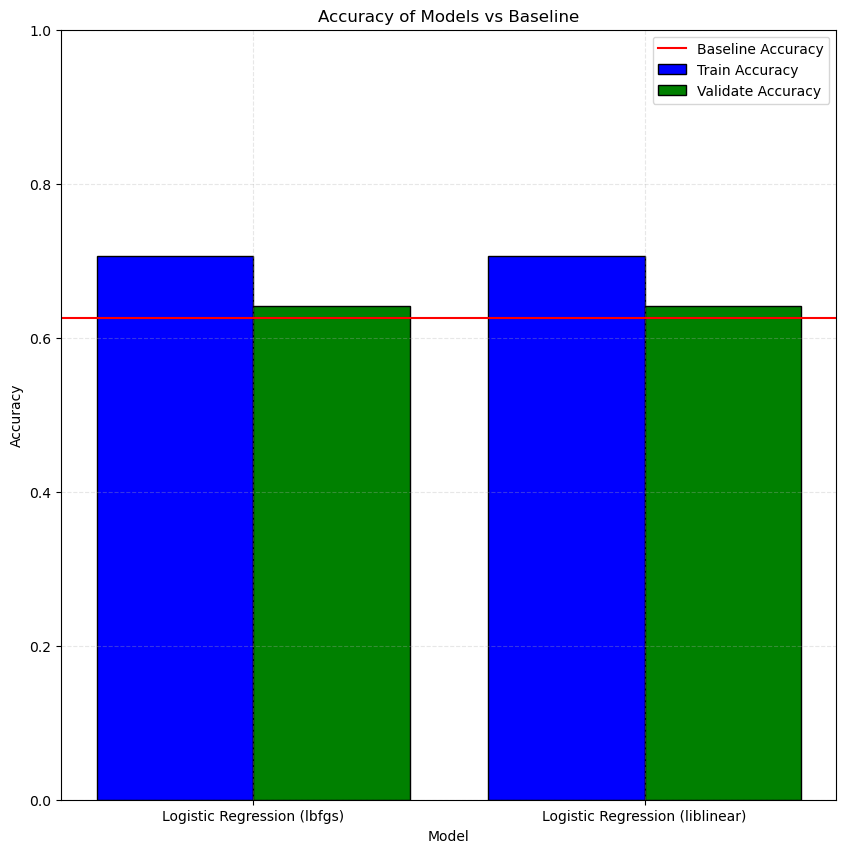

In [66]:
logit = LogisticRegression(C=.5, random_state=8675309, intercept_scaling=1, solver='lbfgs')
logit.fit(x_train, y_train)
trainacc = logit.score(x_train,y_train)
valacc = logit.score(x_val, y_val)

logit = LogisticRegression(C=1, random_state=8675309, solver='liblinear')
logit.fit(x_train, y_train)
trainacc2 = logit.score(x_train,y_train)
valacc2 = logit.score(x_val, y_val)

plt.figure(figsize=(10,10))
X = ['Logistic Regression (lbfgs)','Logistic Regression (liblinear)']
baseline=accuracy_score(y_train, train['baseline'])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, trainacc, 0.4, label = 'Train Accuracy', color=['blue'], ec='black')
plt.bar(X_axis + 0.2, valacc, 0.4, label = 'Validate Accuracy', color=['green'], ec='black')

plt.axhline(y = baseline, color = 'r', linestyle = '-', label='Baseline Accuracy')

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models vs Baseline")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.show()

In [ ]:
def model_viz(df):
    plt.figure(figsize=(10,10))
    X = ['Cluster 1','Cluster 2','Both','None']
    trainacc = df['train_accuracy']
    valacc = df['validate_accuracy']
    diff= df['difference']
  
    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.2, trainacc, 0.4, label = 'Train Accuracy', color=['blue'], ec='black')
    plt.bar(X_axis + 0.2, valacc, 0.4, label = 'Validate Accuracy', color=['green'], ec='black')
  
    plt.xticks(X_axis, X)
    plt.xlabel("Model Includes")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Models")
    plt.ylim(0,.7)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()
    plt.show()

# round 2

In [32]:
conflict=explore_conflict()

for i, n in enumerate(conflict['time_to_conflict']):
    if n<=30:
        conflict.at[i, 'time_to_conflict'] = 1
    elif 30<n<=365:
        conflict.at[i, 'time_to_conflict'] = 2
    elif n>365:
        conflict.at[i, 'time_to_conflict'] = 3
        
conflict=pd.get_dummies(conflict, columns=['type_of_conflict',
                                           'region', 'incompatibility']) 

conflict=conflict.drop(columns=['start_date', 'start_date2', 'location', 'side_a', 'side_b', 'territory_name'])
conflict=conflict.astype('int')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [33]:
conflict.head()

,side_a_2nd,side_b_2nd,time_to_conflict,type_of_conflict_1,type_of_conflict_2,type_of_conflict_3,type_of_conflict_4,region_1,"region_1, 2","region_1, 2, 3, 5",...,"region_1, 3, 5","region_1, 4","region_1, 5",region_2,region_3,region_4,region_5,incompatibility_1,incompatibility_2,incompatibility_3
0,0,0,3,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [34]:
train, val, test=tts(conflict, 'time_to_conflict')

In [35]:
x_train= train.drop(columns=['time_to_conflict'])
y_train= train['time_to_conflict']

x_val= val.drop(columns=['time_to_conflict'])
y_val= val['time_to_conflict']

x_test= test.drop(columns=['time_to_conflict'])
y_test= test['time_to_conflict']

# random forest 2

In [36]:
metrics= []

for n in range(1, 21):
    for i in range(2, 21):
                                                    #build the model
        rm= RandomForestClassifier(max_depth= i,
                                         min_samples_leaf= n, random_state=8675309)
                                                    #fit the model
        rm.fit(x_train, y_train)
                                                    #get accuracy from in and out of sample data
        in_sample= rm.score(x_train, y_train)
        out_of_sample= rm.score(x_val, y_val)
                                                    #assigning the output to a dictionary
        output={
            'max_depth': i,
            'min_samples_leaf': n,
            'train_accuracy': in_sample,
            'validate_accuracy': out_of_sample
        }
                                                    #appending the output dictionary to the empty metrics list
        metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy']

In [37]:
metrics.head().sort_values(by='difference', ascending=True)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,1,0.640244,0.549296,0.090948
1,3,1,0.646341,0.535211,0.111130
2,4,1,0.689024,0.563380,0.125644
4,6,1,0.701220,0.563380,0.137839
3,5,1,0.695122,0.549296,0.145826


# decision tree 2

In [38]:
metrics=[]
for n in range(1,21):
    for i in range(1,21):
        dtc=DecisionTreeClassifier(max_depth=n, min_samples_leaf=i, random_state=8675309)

        dtc.fit(x_train, y_train)

        in_sample= dtc.score(x_train, y_train)
        out_of_sample= dtc.score(x_val, y_val)

        output={
                'max_depth': i,
                'min_samples_leaf': n,
                'train_accuracy': in_sample,
                'validate_accuracy': out_of_sample
            }
        metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy']

In [39]:
metrics.head().sort_values(by='difference', ascending=True)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,1,1,0.640244,0.549296,0.090948
1,2,1,0.640244,0.549296,0.090948
2,3,1,0.640244,0.549296,0.090948
3,4,1,0.640244,0.549296,0.090948
4,5,1,0.640244,0.549296,0.090948


# knn 2

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred_proba = knn.predict_proba(x_train)

In [44]:
knn.score(x_train,y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6646341463414634

In [45]:
knn.score(x_val,y_val)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5774647887323944

In [46]:
metrics=[]
for n in range(1,21):
    knn= KNeighborsClassifier(n_neighbors=n, weights='uniform')
    knn.fit(x_train,y_train)
    
    in_sample= knn.score(x_train, y_train)
    out_of_sample= knn.score(x_val, y_val)
    
    output={
                'n_neighbors': n,
                'train_accuracy': in_sample,
                'validate_accuracy': out_of_sample
            }
    metrics.append(output)
metrics=pd.DataFrame(data=metrics)
metrics['difference']=metrics['train_accuracy']-metrics['validate_accuracy']    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [47]:
metrics.head().sort_values(by='difference', ascending=True)

,n_neighbors,train_accuracy,validate_accuracy,difference
2,3,0.664634,0.577465,0.087169
4,5,0.664634,0.577465,0.087169
3,4,0.670732,0.577465,0.093267
1,2,0.621951,0.521127,0.100824
0,1,0.567073,0.366197,0.200876


# logistic regression 2

In [48]:
logit = LogisticRegression(C=.5, random_state=8675309, intercept_scaling=1, solver='lbfgs')

In [49]:
logit.fit(x_train, y_train)

LogisticRegression(C=0.5, random_state=8675309)

In [50]:
logit.score(x_train,y_train)

0.6646341463414634

In [51]:
logit.score(x_val, y_val)

0.5774647887323944

# liblinear

In [52]:
logit = LogisticRegression(C=1, random_state=8675309, intercept_scaling=1, solver='liblinear')

In [53]:
logit.fit(x_train, y_train)

LogisticRegression(C=1, random_state=8675309, solver='liblinear')

In [54]:
logit.score(x_train,y_train)

0.6707317073170732

In [55]:
logit.score(x_val, y_val)

0.5633802816901409